### Libraries Used:

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE

### 1-Load and Prepare Dataset


In [74]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")


### 2-Data Preprocessing

In [87]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,platelets_per_age,creatinine_per_ck
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,3486.842105,0.003259
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,4702.821964,0.000140
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,2454.545455,0.008844
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,4117.647059,0.016964
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,4954.545455,0.016770


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  platelets_per_age         299 non-null    float64
 14  creatinine

In [93]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,platelets_per_age,creatinine_per_ck
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107,4440.898332,0.008655
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767,2004.281931,0.013689
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000,353.521127,0.000130
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000,3191.858850,0.001733
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000,4137.254902,0.004762
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000,5241.114524,0.010000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000,18478.260870,0.125000


In [75]:
# check for missing values
df.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [94]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

In [76]:
# remove missing values
data_copy=df

data_copy

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [77]:
data_copy =data_copy.dropna()#drop all rows with any missing values

data_copy

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### 3-Data Visualizations 


C:\Users\ENG_ABDELRAHMAN\AppData\Local\Temp\ipykernel_22560\2476919418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEATH_EVENT', data=df, palette='Set2')
C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


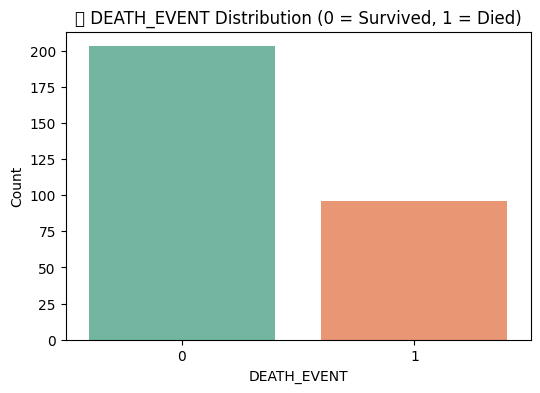

In [96]:
#1. Countplot - Target Distribution

plt.figure(figsize=(6,4))
sns.countplot(x='DEATH_EVENT', data=df, palette='Set2')
plt.title("🎯 DEATH_EVENT Distribution (0 = Survived, 1 = Died)")
plt.xlabel("DEATH_EVENT")
plt.ylabel("Count")
plt.show()

C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


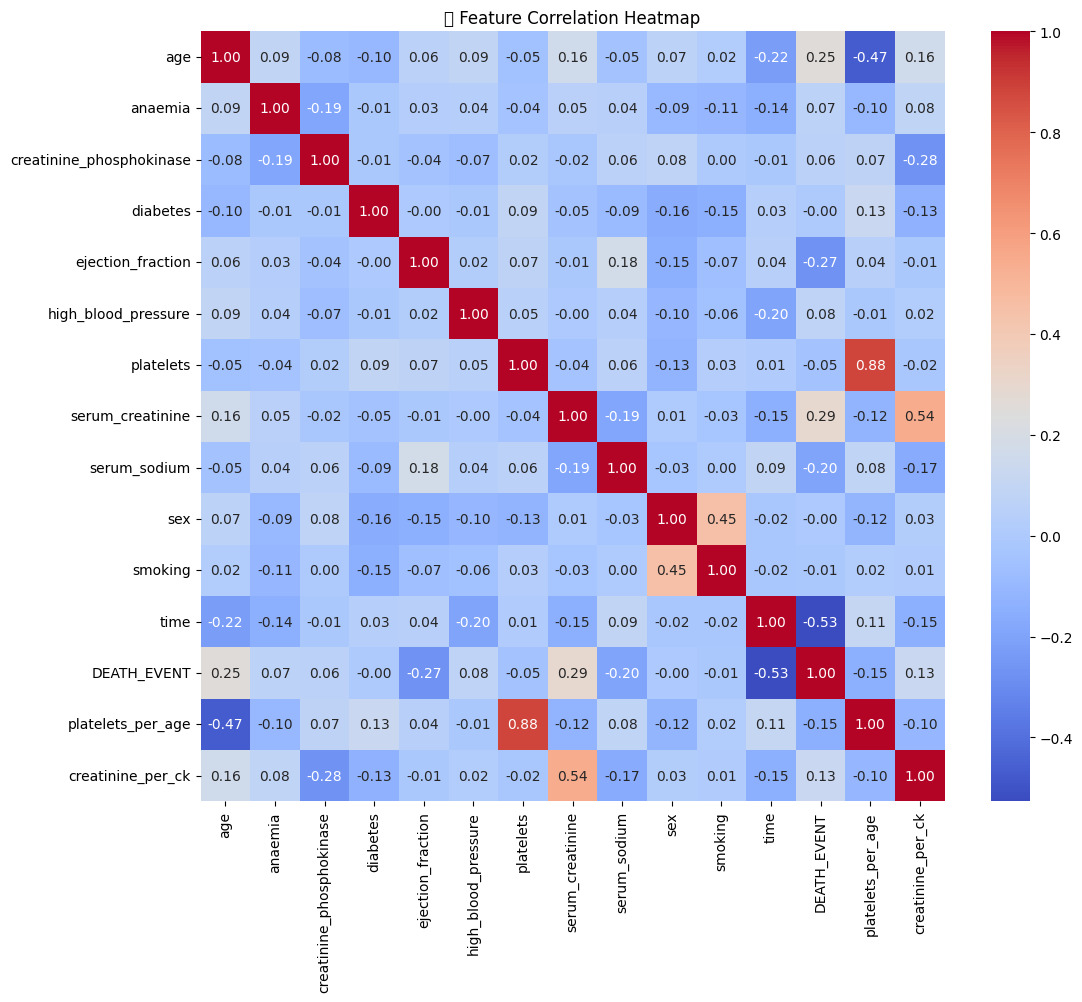

In [97]:
#2. Correlation Heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔥 Feature Correlation Heatmap")
plt.show()

C:\Users\ENG_ABDELRAHMAN\AppData\Local\Temp\ipykernel_22560\3165403452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set3')
C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


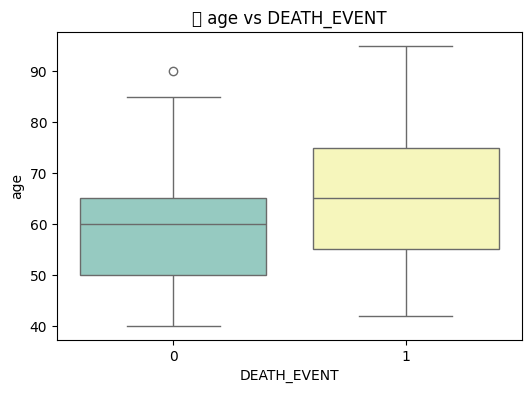

C:\Users\ENG_ABDELRAHMAN\AppData\Local\Temp\ipykernel_22560\3165403452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set3')
C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


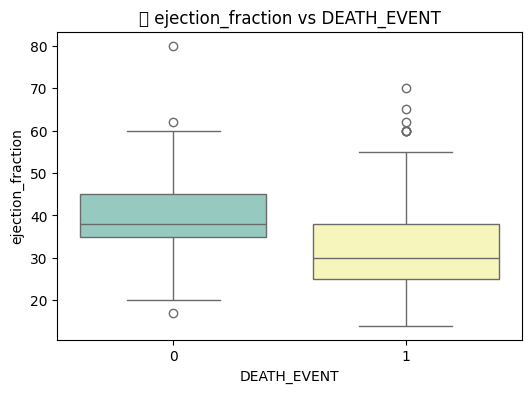

C:\Users\ENG_ABDELRAHMAN\AppData\Local\Temp\ipykernel_22560\3165403452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set3')
C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


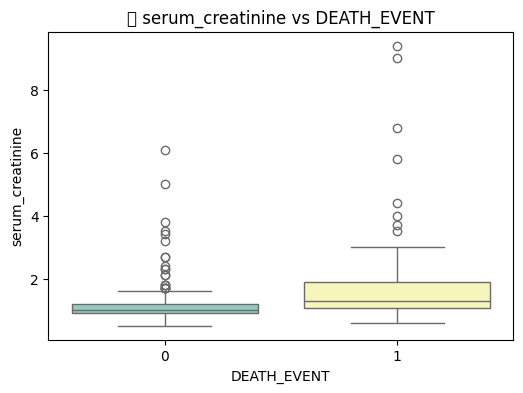

C:\Users\ENG_ABDELRAHMAN\AppData\Local\Temp\ipykernel_22560\3165403452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set3')
C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


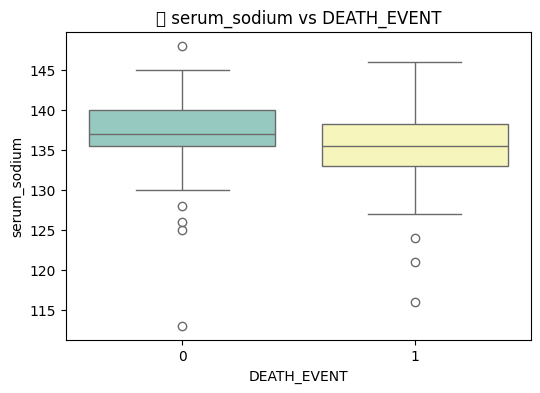

C:\Users\ENG_ABDELRAHMAN\AppData\Local\Temp\ipykernel_22560\3165403452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set3')
C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


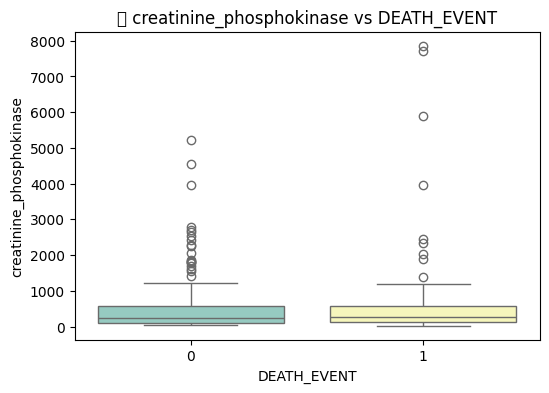

C:\Users\ENG_ABDELRAHMAN\AppData\Local\Temp\ipykernel_22560\3165403452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set3')
C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


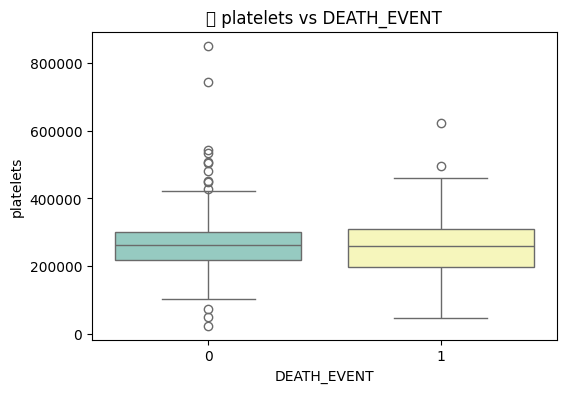

In [98]:
# 3. Boxplots: Numerical Features vs DEATH_EVENT
num_cols = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'creatinine_phosphokinase', 'platelets']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set3')
    plt.title(f"📦 {col} vs DEATH_EVENT")
    plt.xlabel("DEATH_EVENT")
    plt.ylabel(col)
    plt.show()

C:\Users\ENG_ABDELRAHMAN\AppData\Local\Temp\ipykernel_22560\340317990.py:5: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


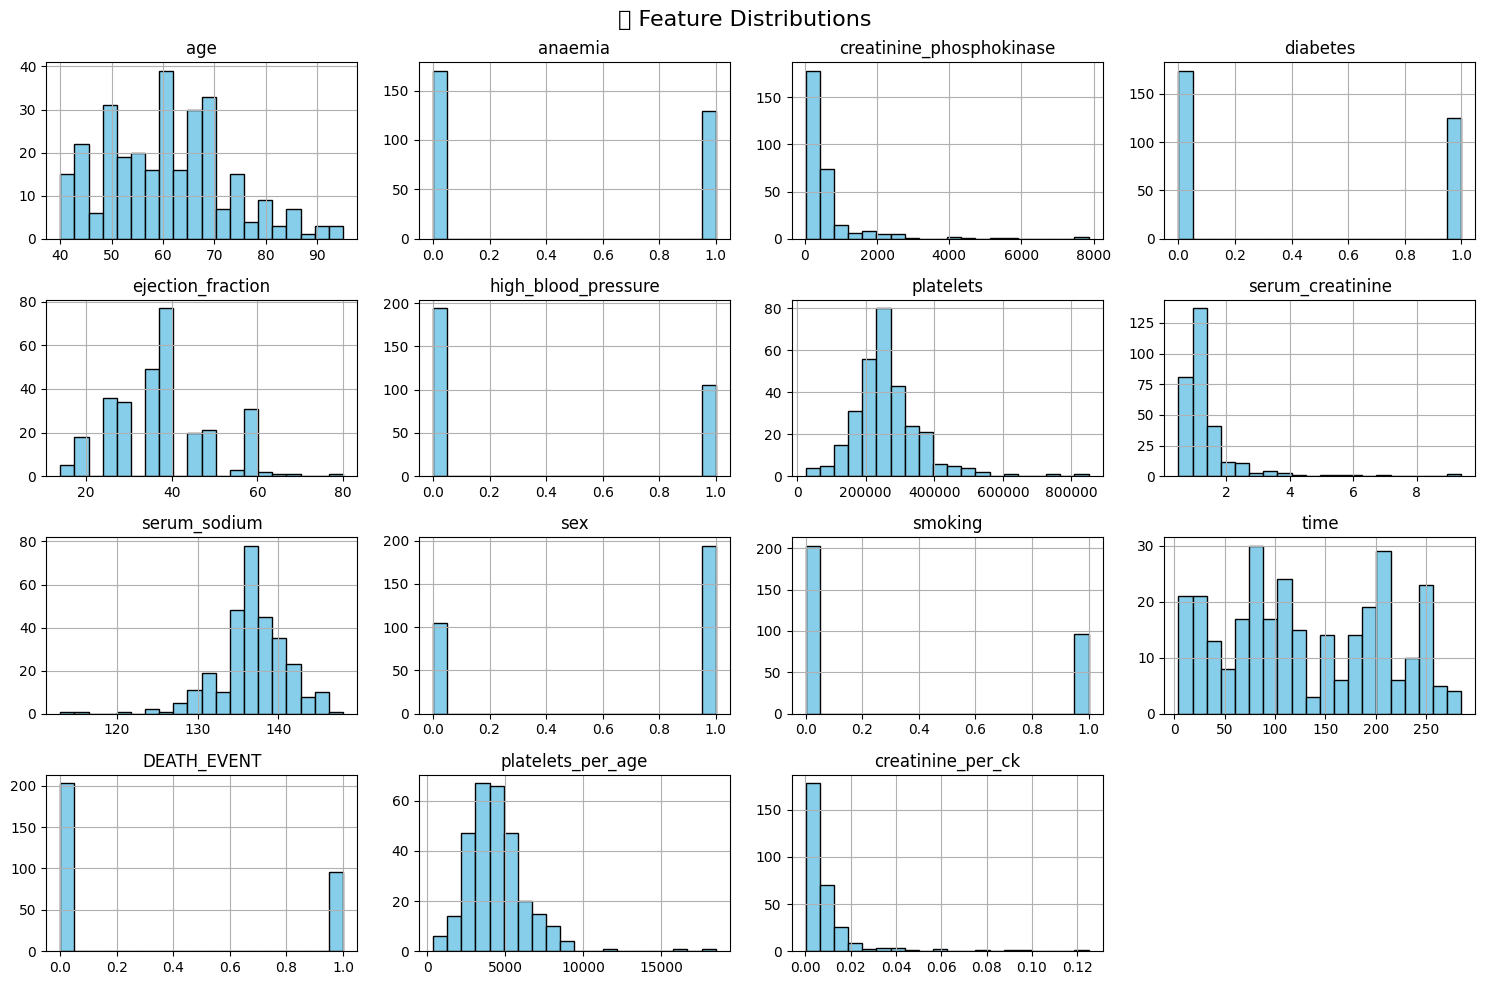

In [99]:
#  4. Histogram of All Features

df.hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("📊 Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


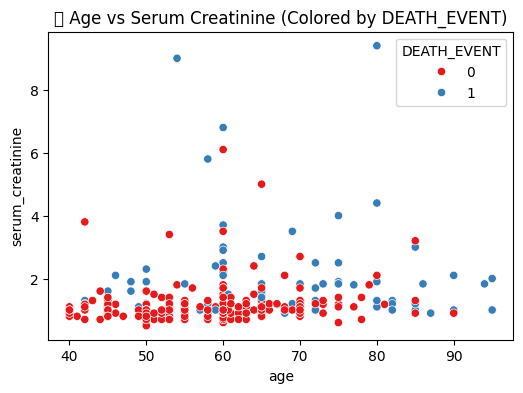

In [100]:
#5. Scatter Plot: Age vs Serum Creatinine

plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='serum_creatinine', hue='DEATH_EVENT', data=df, palette='Set1')
plt.title("📍 Age vs Serum Creatinine (Colored by DEATH_EVENT)")
plt.show()


C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


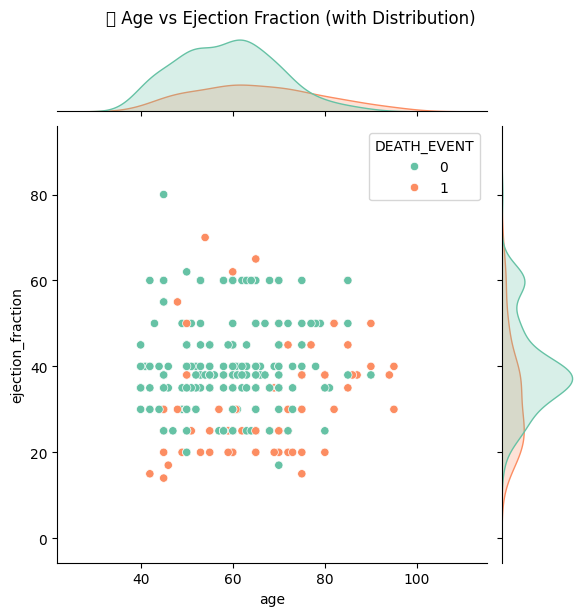

In [101]:
#  6. Jointplot: Age vs Ejection Fraction

sns.jointplot(x='age', y='ejection_fraction', data=df, kind='scatter', hue='DEATH_EVENT', palette='Set2')
plt.suptitle("📌 Age vs Ejection Fraction (with Distribution)", y=1.02)
plt.show()

C:\Users\ENG_ABDELRAHMAN\AppData\Local\Temp\ipykernel_22560\3229741676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y='serum_sodium', data=df, palette='coolwarm')
C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


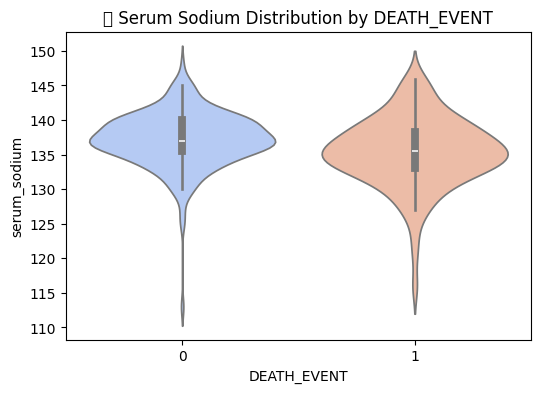

In [102]:
#  7. Violin Plot: Serum Sodium by DEATH_EVENT
plt.figure(figsize=(6,4))
sns.violinplot(x='DEATH_EVENT', y='serum_sodium', data=df, palette='coolwarm')
plt.title("🎻 Serum Sodium Distribution by DEATH_EVENT")
plt.show()

C:\Users\ENG_ABDELRAHMAN\AppData\Local\Temp\ipykernel_22560\2856141138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='DEATH_EVENT', y='platelets', data=df, palette='muted')
C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128029 (\N{HONEYBEE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


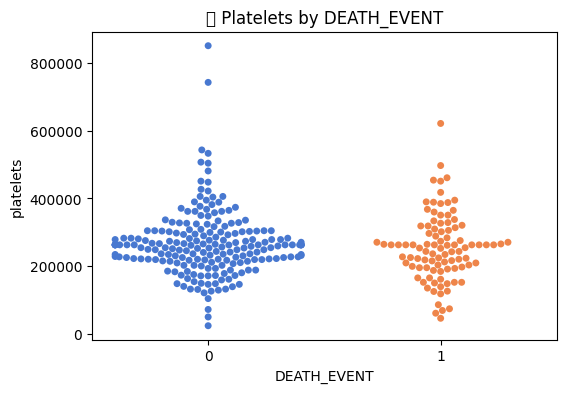

In [103]:
# 8. Swarm Plot: Platelets by DEATH_EVENT
plt.figure(figsize=(6,4))
sns.swarmplot(x='DEATH_EVENT', y='platelets', data=df, palette='muted')
plt.title("🐝 Platelets by DEATH_EVENT")
plt.show()


C:\Users\ENG_ABDELRAHMAN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


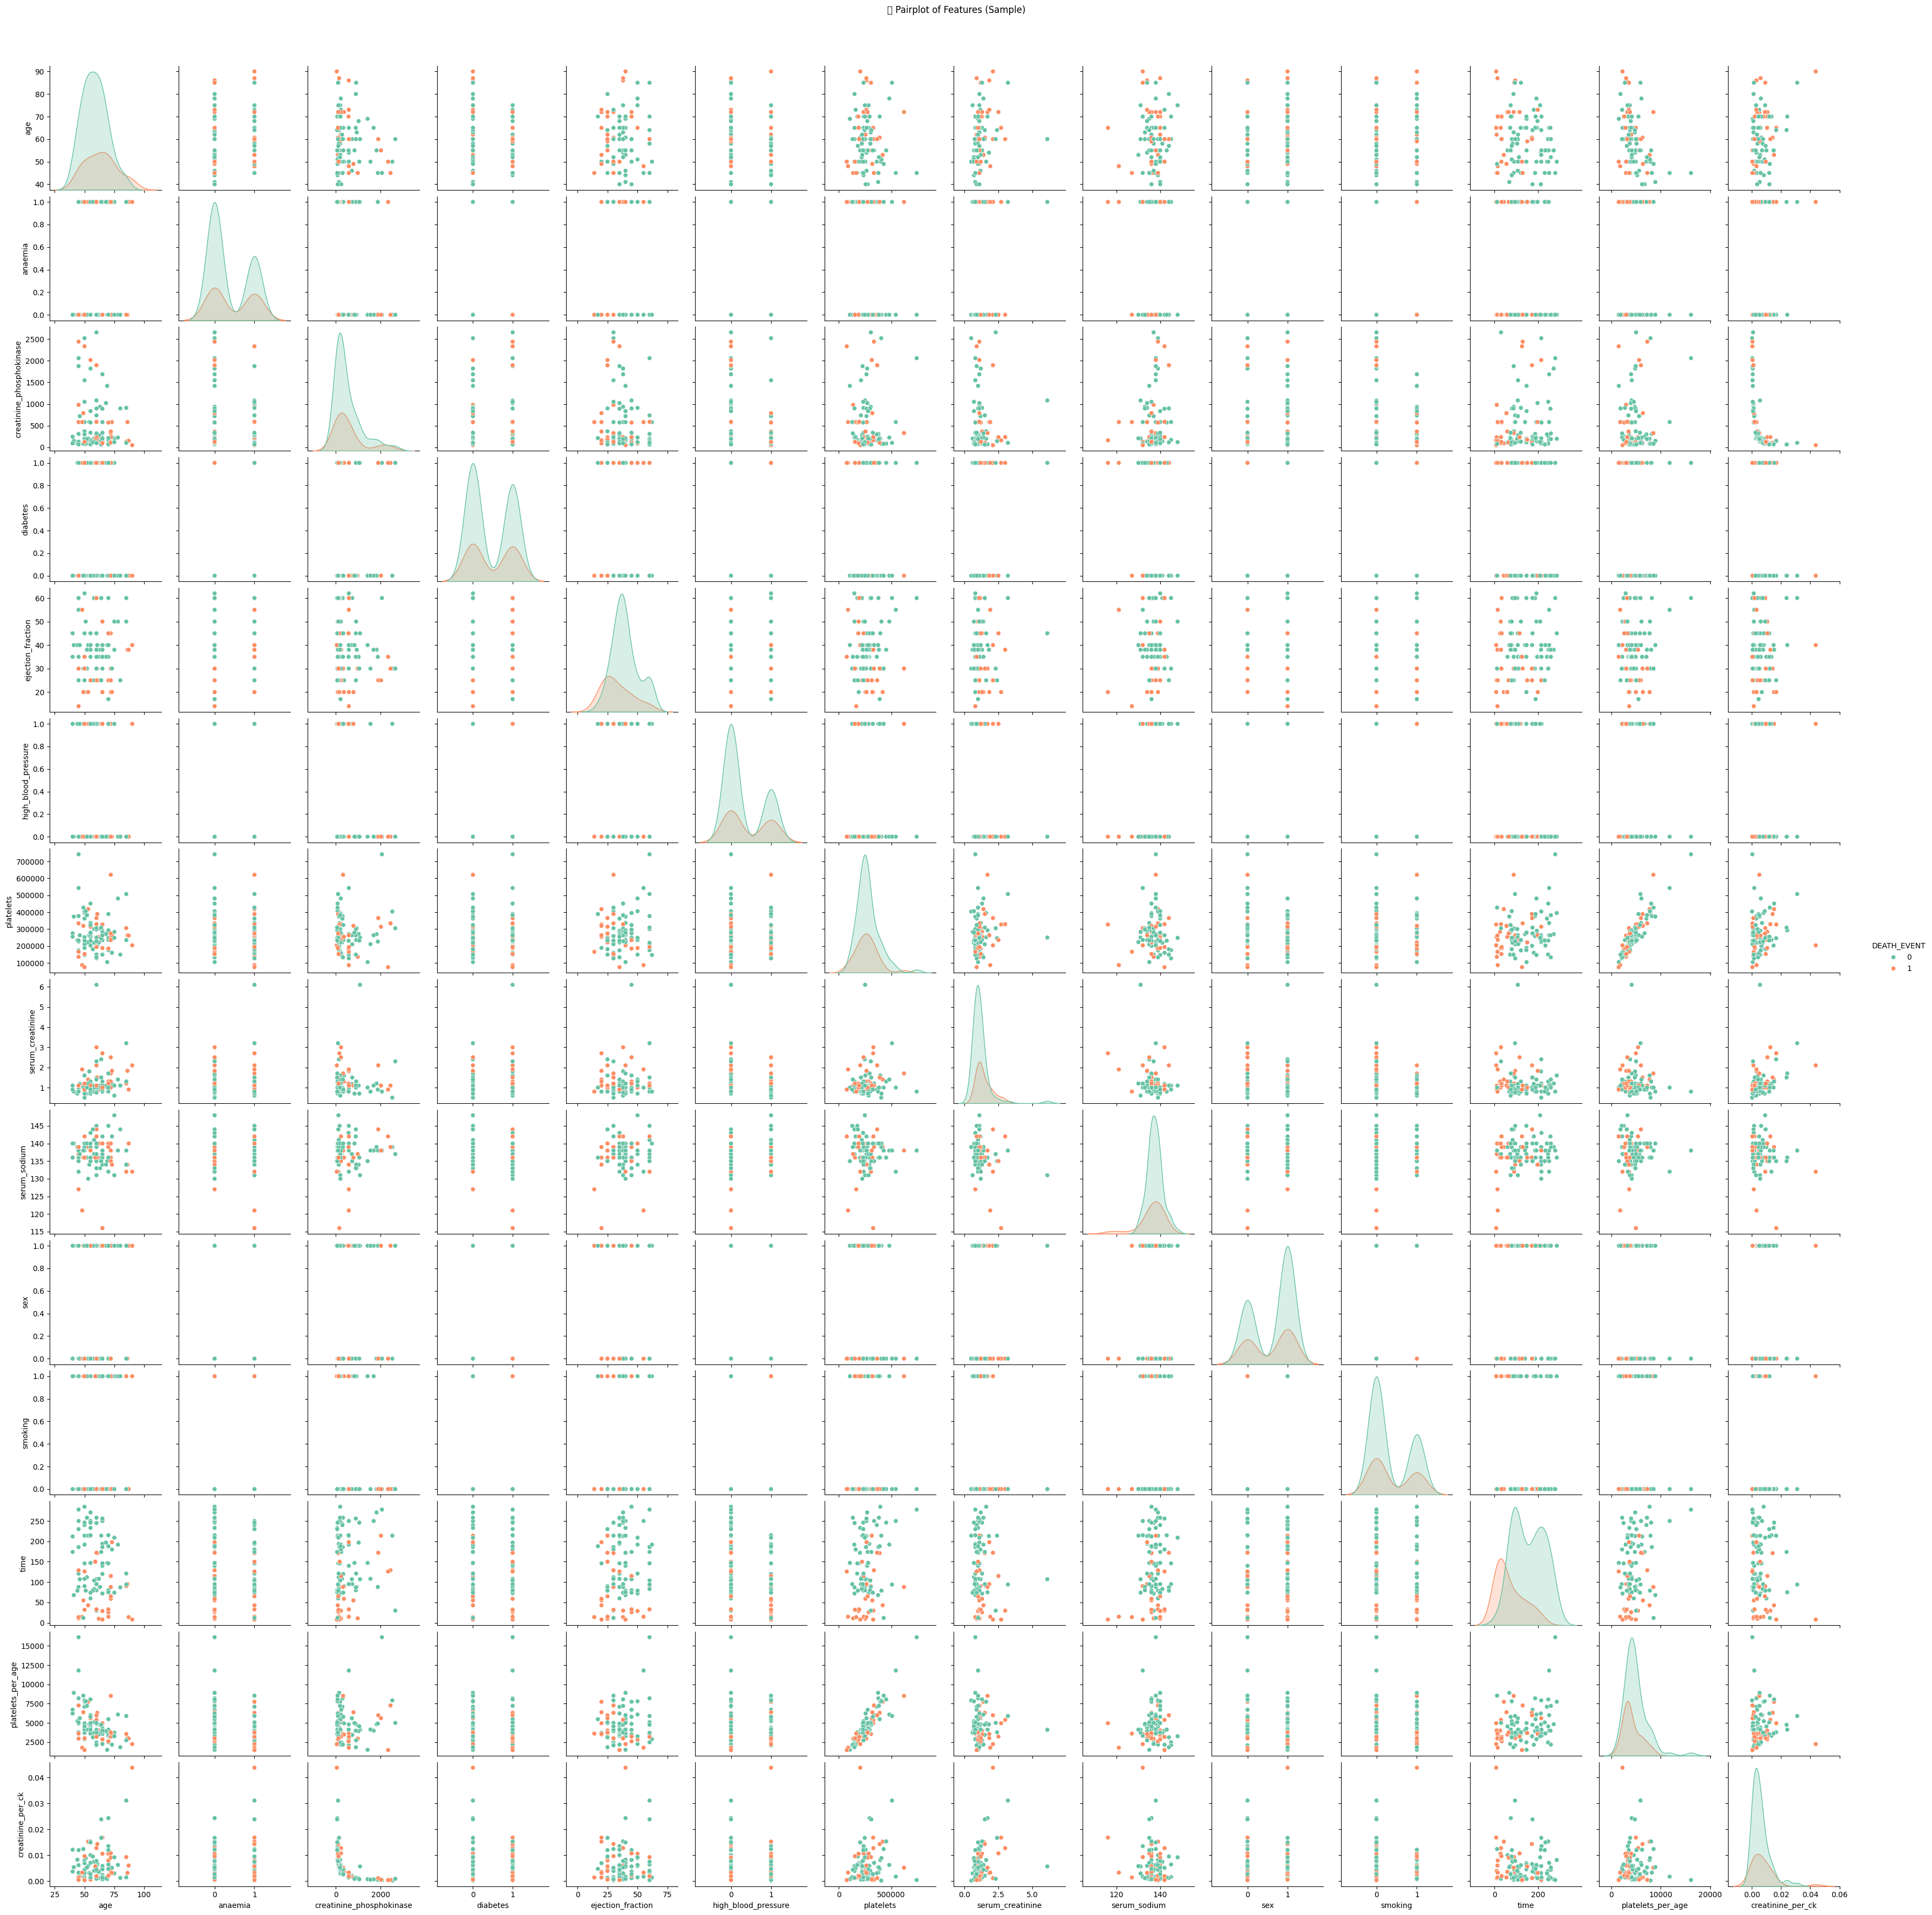

In [104]:
# 9. Pairplot: All Features Colored by DEATH_EVENT

sample_df = df.sample(100, random_state=1)
sns.pairplot(data=sample_df, hue="DEATH_EVENT", palette="Set2")
plt.suptitle("🔁 Pairplot of Features (Sample)", y=1.02)
plt.show()

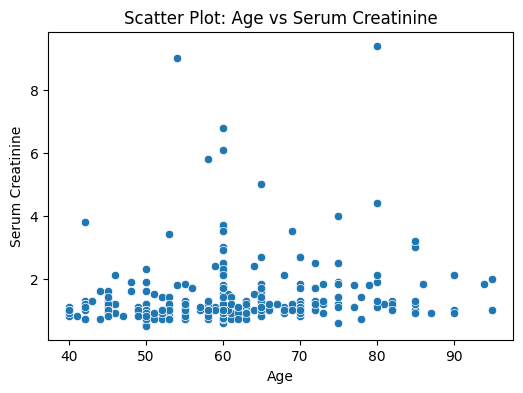

In [106]:
#  10. Scatter Plot between 'age' and a numerical feature
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='serum_creatinine', data=df)
plt.title("Scatter Plot: Age vs Serum Creatinine")
plt.xlabel("Age")
plt.ylabel("Serum Creatinine")
plt.show()

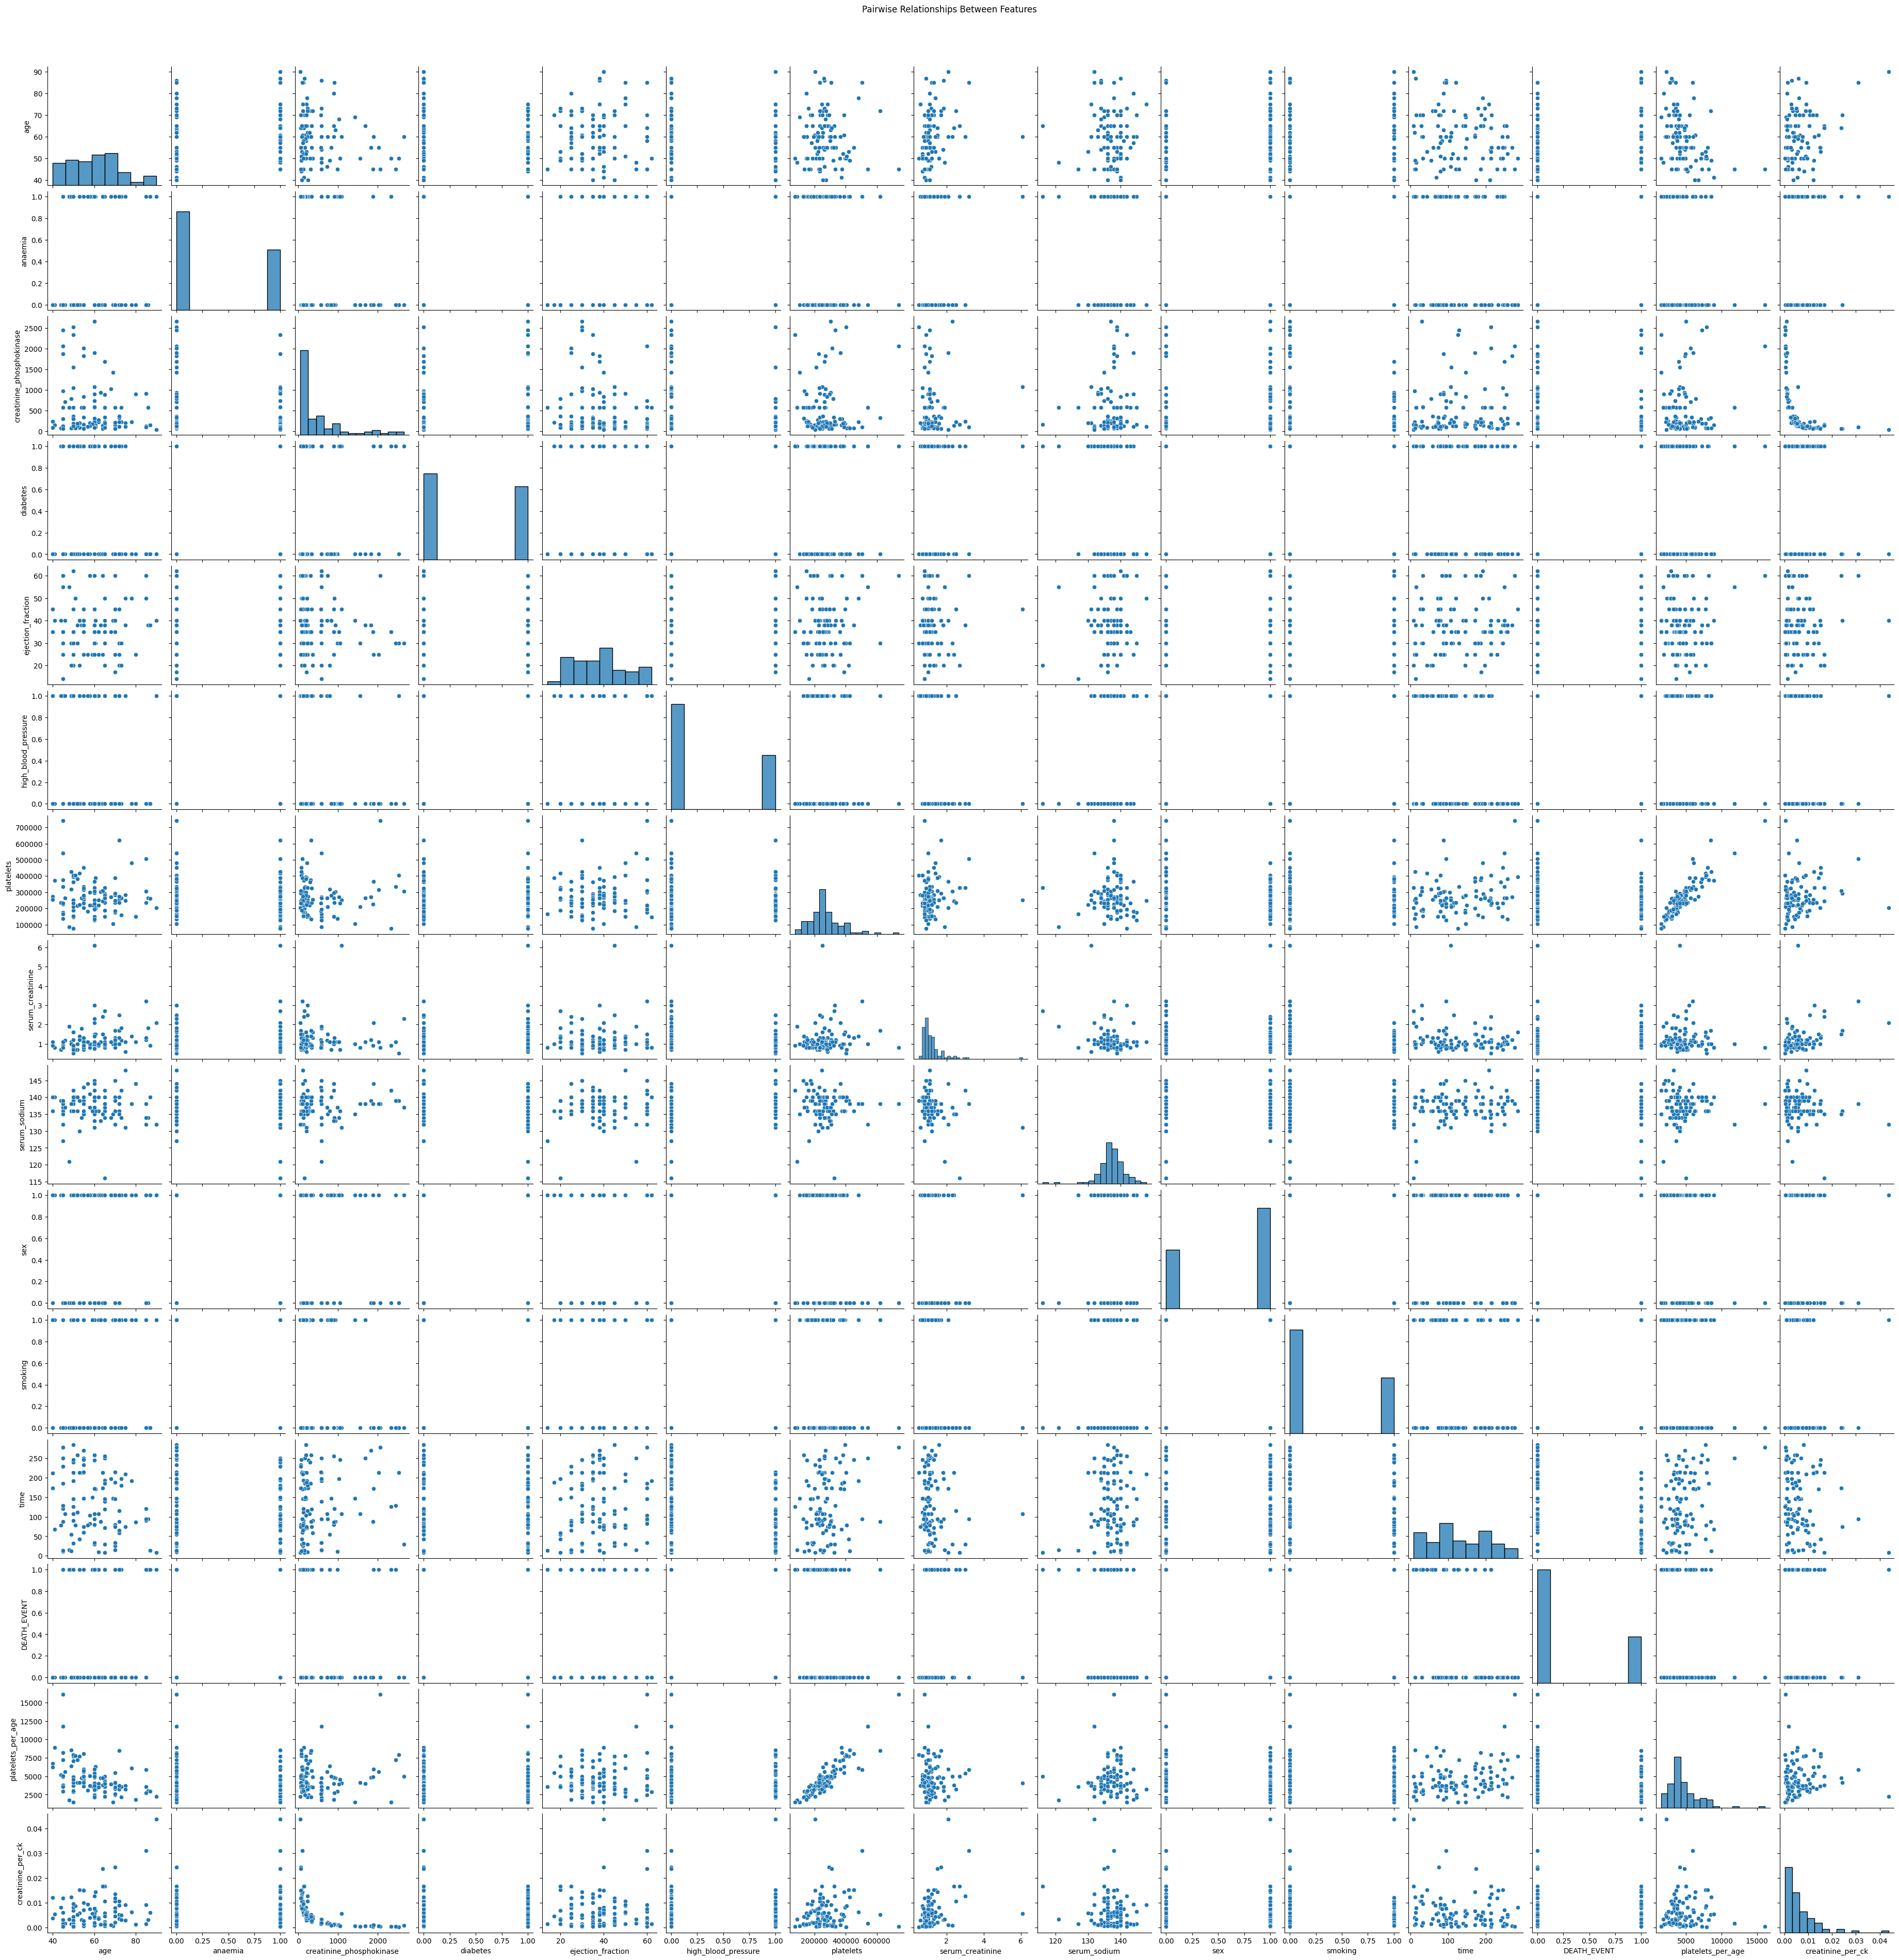

In [109]:
# ✅ 11. Pairplot for all features
sample = df.sample(100, random_state=1) if len(df) > 100 else df
sns.pairplot(data=sample)
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

###  4-Add Feature Engineering



In [78]:
df["platelets_per_age"] = df["platelets"] / (df["age"] + 1)
df["creatinine_per_ck"] = df["serum_creatinine"] / (df["creatinine_phosphokinase"] + 1)

X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

### 5-Outlier Handling

In [79]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X = X[~((X < Q1 - 1.5 * IQR) | (X > Q3 + 1.5 * IQR)).any(axis=1)]
y = y.loc[X.index]
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

### 6-Feature Scaling

In [80]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 7-Smote

In [81]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)


### 8-Train Model

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


### 9-Use Random Forest Model

In [83]:
model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

### 10- Accuracy&Classification Report

In [84]:
y_pred = model.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


🎯 Accuracy: 0.9508196721311475
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       0.97      0.94      0.96        34

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61

R2 Score: 0.8006535947712419


### 11-Cross Validation 

In [85]:

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=skf)
print("📊 Stratified CV Mean Accuracy:", scores.mean())



📊 Stratified CV Mean Accuracy: 0.8380952380952381


### 12-Save The Model

In [86]:
joblib.dump(model, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']